In [1]:
# predict doctor's consultation fee

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width',1000)

In [265]:
train=pd.read_excel('Final_Train.xlsx')
test=pd.read_excel('Final_Test.xlsx')
sample=pd.read_excel('Sample_submission.xlsx')

In [266]:
test.shape,train.shape,sample.shape

((1987, 6), (5961, 7), (1987, 1))

In [5]:
train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [6]:
test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [7]:
# there are a few missing values

In [8]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [9]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [10]:
# take years out of exp
# Extract city from place
# Miscellaneous_Info has sentences

In [11]:
train.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [12]:
# all are object

In [13]:
# lets count the values

# EDA

# Univariate

In [14]:
train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile', 'Miscellaneous_Info', 'Fees'], dtype='object')

In [16]:
train['Qualification'].nunique()

1420

In [17]:
# there are a lot of unique values in qualification

In [18]:
train['Experience'].nunique()

64

In [19]:
train['Rating'].nunique()

51

In [20]:
train['Place'].nunique()

877

In [21]:
train['Profile'].nunique()

6

In [22]:
train['Miscellaneous_Info'].nunique()

2998

In [25]:
# Easy Approach
# drop rating
# drop miscellaneous_info
# drop qualification
# take years out of exp
# Extract city from place
# too less number of columns left

In [24]:
# 2nd Approach
# extraction from qualification
# imputation in rating
# drop miscellaneous
# take years out of exp
# Extract city from place

In [26]:
# evaluate individual columns

In [27]:
train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile', 'Miscellaneous_Info', 'Fees'], dtype='object')

In [29]:
train['Qualification'].head(100)

0                                 BHMS, MD - Homeopathy
1                          BAMS, MD - Ayurveda Medicine
2                        MBBS, MS - Otorhinolaryngology
3                                   BSc - Zoology, BAMS
4                                                  BAMS
5                                                  BAMS
6                                                  BHMS
7                                                   BDS
8                           MBBS, MD - General Medicine
9                                              BSc, BDS
10                                  MBBS, MS, DNB - ENT
11                                                 BAMS
12                                             BDS, MDS
13              BDS, MDS - Oral & Maxillofacial Surgery
14    MBBS, Diploma in Otorhinolaryngology (DLO), DN...
15                          MBBS, MD - General Medicine
16           MBBS, Diploma in Otorhinolaryngology (DLO)
17                                 MBBS, MF- Hom

In [30]:
# we can create a columns edu_level based on the number of degrees
# then drop Qualification

In [31]:
train['Experience'].head(100)

0     24 years experience
1     12 years experience
2      9 years experience
3     12 years experience
4     20 years experience
5      8 years experience
6     42 years experience
7     10 years experience
8     14 years experience
9     23 years experience
10     5 years experience
11     7 years experience
12     9 years experience
13    21 years experience
14    12 years experience
15    10 years experience
16    24 years experience
17     5 years experience
18    19 years experience
19    19 years experience
20    21 years experience
21    14 years experience
22    41 years experience
23    31 years experience
24    23 years experience
25     5 years experience
26    25 years experience
27    12 years experience
28    16 years experience
29    15 years experience
30     7 years experience
31    11 years experience
32    14 years experience
33    23 years experience
34     9 years experience
35    15 years experience
36    10 years experience
37    12 years experience
38    31 yea

In [32]:
# extract the number

In [33]:
train['Rating'].value_counts()

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
92%      66
90%      66
91%      60
89%      42
88%      41
85%      27
82%      23
86%      21
83%      21
80%      19
77%      16
87%      14
79%      13
84%      13
67%      12
81%      12
71%       9
76%       9
73%       8
75%       8
74%       7
60%       7
78%       6
56%       5
68%       5
69%       4
70%       4
72%       3
57%       3
55%       2
33%       2
62%       2
63%       2
64%       2
58%       1
40%       1
53%       1
47%       1
48%       1
65%       1
36%       1
45%       1
7%        1
Name: Rating, dtype: int64

In [36]:
# convert it into number,
# fill missing values with 0 and
# impute missing values with median

In [37]:
train['Place'].head(200)

0                         Kakkanad, Ernakulam
1                       Whitefield, Bangalore
2                  Mathikere - BEL, Bangalore
3                Bannerghatta Road, Bangalore
4                       Keelkattalai, Chennai
5                              Porur, Chennai
6                           Karol Bagh, Delhi
7                          Arekere, Bangalore
8                         Old City, Hyderabad
9                           Athani, Ernakulam
10                   Thousand Lights, Chennai
11                      Somajiguda, Hyderabad
12          Coimbatore Racecourse, Coimbatore
13                   Jubilee Hills, Hyderabad
14                              Kondli, Delhi
15                    Saroor Nagar, Hyderabad
16                     Tambaram West, Chennai
17                      Purasawakkam, Chennai
18                            KPHB, Hyderabad
19                      HSR Layout, Bangalore
20                       Pollachi, Coimbatore
21                   Vasundhra Enc

In [38]:
# Extract area and city out of it

In [39]:
train['Miscellaneous_Info'].head(200)

0                   100% 16 Feedback Kakkanad, Ernakulam
1                  98% 76 Feedback Whitefield, Bangalore
2                                                    NaN
3      Bannerghatta Road, Bangalore ₹250 Available on...
4                  100% 4 Feedback Keelkattalai, Chennai
5                                                    NaN
6                                                    NaN
7      Dental Fillings Crowns and Bridges Fixing Impa...
8                                                    NaN
9                                                    NaN
10                                                   NaN
11                                                   NaN
12     98% 14 Feedback Coimbatore Racecourse, Coimbatore
13         Dental Crowns Facet Dental Dental prophylaxis
14                                                   NaN
15                                                   NaN
16                                                   NaN
17                             

In [44]:
# check number of qualifications

In [267]:
num_deg_train = train.Qualification.apply(lambda x: len(x.split(',')))

In [268]:
num_deg_train.max(),num_deg_train.min()

(10, 1)

In [269]:
num_deg_test = test.Qualification.apply(lambda x: len(x.split(',')))

In [270]:
num_deg_test.max(),num_deg_test.min()

(17, 1)

In [271]:
train.Qualification[train.Qualification.apply(lambda y : len(y.split(','))).idxmax()].split(",")

['Fellowship in Oral implantlogy',
 ' Certified Advance Course In Endodontics',
 ' Certified in Orthodontics',
 ' Certification in Full Mouth Rehabilitation',
 ' Certified BPS Dentist',
 ' Certificate in Cosmetic Dentistry',
 ' Professional Implantology Training Course (PITC)',
 ' Fellowship in Advanced Endoscopic Sinus Surgery',
 ' Degree in Dental Implant',
 ' Fellowship in Lasers & Cosmetology']

In [56]:
# lets clear leading white spaces
# clear all the spaces inside and
# lowercase all the chars

In [272]:
import re
def process_qual(string):
    sent = re.sub(r'\([^()]+\)', lambda p: p.group().replace(",","-"), string)
    return ','.join(sorted(sent.lower().replace(" ","").split(",")))

In [273]:
train['Qualification'] = train['Qualification'].apply(lambda x: process_qual(x))
test['Qualification'] = test['Qualification'].apply(lambda x: process_qual(x))

In [274]:
train['Qualification'].head(100)

0                                    bhms,md-homeopathy
1                              bams,md-ayurvedamedicine
2                           mbbs,ms-otorhinolaryngology
3                                      bams,bsc-zoology
4                                                  bams
5                                                  bams
6                                                  bhms
7                                                   bds
8                               mbbs,md-generalmedicine
9                                               bds,bsc
10                                      dnb-ent,mbbs,ms
11                                                 bams
12                                              bds,mds
13                    bds,mds-oral&maxillofacialsurgery
14       diplomainotorhinolaryngology(dlo),dnb-ent,mbbs
15                              mbbs,md-generalmedicine
16               diplomainotorhinolaryngology(dlo),mbbs
17                                   mbbs,mf-hom

In [275]:
train['Qualification'].str.split(',').str[0]

0       bhms
1       bams
2       mbbs
3       bams
4       bams
        ... 
5956    mbbs
5957    mbbs
5958    mbbs
5959    mbbs
5960     bds
Name: Qualification, Length: 5961, dtype: object

In [276]:
def seperate_qual(df, column, col_number):
    return df[column].str.split(',').str[col_number]

In [277]:
# lets create 5 columns of different quals
for i in range(0,5):
    degree = "Degree_"+ str(i+1)
    train[degree] = seperate_qual(train,'Qualification', i)

In [278]:
# lets create 5 columns of different quals
for i in range(0,5):
    degree = "Degree_"+ str(i+1)
    test[degree] = seperate_qual(test,'Qualification', i)

In [70]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Degree_1,Degree_2,Degree_3,Degree_4,Degree_5
0,"bhms,md-homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,bhms,md-homeopathy,NaN,NaN,NaN
1,"bams,md-ayurvedamedicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,bams,md-ayurvedamedicine,NaN,NaN,NaN
2,"mbbs,ms-otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,mbbs,ms-otorhinolaryngology,NaN,NaN,NaN
3,"bams,bsc-zoology",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,bams,bsc-zoology,NaN,NaN,NaN
4,bams,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,bams,NaN,NaN,NaN,NaN


In [71]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Degree_1,Degree_2,Degree_3,Degree_4,Degree_5
0,mbbs,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,mbbs,NaN,NaN,NaN,NaN
1,"diplomainotorhinolaryngology(dlo),mbbs",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,diplomainotorhinolaryngology(dlo),mbbs,NaN,NaN,NaN
2,"ddvl,mbbs",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",ddvl,mbbs,NaN,NaN,NaN
3,bams,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,bams,NaN,NaN,NaN,NaN
4,"bds,mds-conservativedentistry&endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,bds,mds-conservativedentistry&endodontics,NaN,NaN,NaN


In [279]:
# now, drop qualification from both
train.drop('Qualification',axis=1,inplace=True)
test.drop('Qualification',axis=1,inplace=True)

In [280]:
# now, extract the years from exp
train['Experience']=train['Experience'].str.split(' ').str[0]

In [281]:
train['Experience']=train['Experience'].astype(np.int64)

In [282]:
test['Experience']=test['Experience'].str.split(' ').str[0]
test['Experience']=test['Experience'].astype(np.int64)

In [283]:
# In rating, instead of Imputation with median, fill nan values with 0, then drop % and create a new feature owing 
# to the missing values in Rating

In [284]:
train['Rating']=train['Rating'].fillna('0%')
test['Rating']=test['Rating'].fillna('0%')

In [285]:
train['Rating']=train['Rating'].str.replace('%','').astype(np.int64)
test['Rating']=test['Rating'].str.replace('%','').astype(np.int64)

In [286]:
# lets create a new feature Rating_miss
train['Rating_miss']=0
for i in range(len(train)):
    if train['Rating'].iloc[i]==0:
        train['Rating_miss'].iloc[i]=1

In [287]:
# train[['Rating','Rating_miss']].head(50)

In [288]:
test['Rating_miss']=0
for i in range(len(test)):
    if test['Rating'].iloc[i]==0:
        test['Rating_miss'].iloc[i]=1

In [289]:
# let's extract city and locality from location

In [290]:
train['locality']=train['Place'].str.split(',').str[0]

In [291]:
train['city']=train['Place'].str.split(',').str[1]

In [292]:
test['locality']=test['Place'].str.split(',').str[0]
test['city']=test['Place'].str.split(',').str[1]

In [293]:
# lets drop Place
train.drop('Place',axis=1,inplace=True)
test.drop('Place',axis=1,inplace=True)

In [294]:
# lets extract the no of feedbacks from the miscellaneous info

In [295]:
# but first replace nan with ''
train['Miscellaneous_Info']=train['Miscellaneous_Info'].replace(np.NaN,' ')
test['Miscellaneous_Info']=test['Miscellaneous_Info'].replace(np.NaN,' ')

In [296]:
res = re.search(r' (.*?) Feedback',train['Miscellaneous_Info'][100])
res

In [297]:
train['Miscellaneous_Info'][100]

' '

In [298]:
train['number_of_feed']=''
for i in range(len(train)):
    res = re.search(r' (.*?) Feedback',train['Miscellaneous_Info'][i])
    if res:
        train['number_of_feed'].iloc[i]=res.group(1)
    else:
        train['number_of_feed'].iloc[i]='0'

In [299]:
train['number_of_feed'].value_counts()
# there are some unwanted strings in it

0                                             4454
3                                               76
4                                               75
5                                               67
1                                               63
8                                               58
2                                               53
7                                               50
11                                              47
9                                               47
10                                              45
6                                               44
12                                              42
13                                              39
14                                              34
19                                              31
17                                              30
15                                              29
16                                              25
18                             

In [300]:
for i in range(len(train)):
    if len(train['number_of_feed'].iloc[i])>5:
        train['number_of_feed'].iloc[i]='0'

In [301]:
train['number_of_feed'].value_counts()

0       4460
3         76
4         75
5         67
1         63
8         58
2         53
7         50
9         47
11        47
10        45
6         44
12        42
13        39
14        34
19        31
17        30
15        29
16        25
18        24
21        20
29        20
20        19
28        18
23        17
26        15
39        14
24        14
35        14
27        12
33        12
25        12
36        11
37        10
31         9
22         9
40         9
32         9
44         9
42         9
48         8
47         8
45         8
43         8
72         8
49         7
34         7
51         7
38         7
46         7
55         6
54         6
30         6
53         5
65         5
64         5
60         5
82         5
109        5
83         4
78         4
56         4
180        4
98         4
80         4
94         4
52         4
59         4
50         4
102        3
63         3
99         3
84         3
41         3
103        3
92         3
57         3

In [302]:
train['number_of_feed']=train['number_of_feed'].astype(np.int64)

In [303]:
test['number_of_feed']=''
for i in range(len(test)):
    res = re.search(r' (.*?) Feedback',test['Miscellaneous_Info'][i])
    if res:
        test['number_of_feed'].iloc[i]=res.group(1)
    else:
        test['number_of_feed'].iloc[i]='0'

In [304]:
test['number_of_feed'].value_counts()
# there are some unwanted strings in it

0                                         1431
2                                           30
4                                           27
13                                          27
5                                           25
12                                          23
7                                           23
3                                           22
1                                           22
10                                          22
9                                           17
11                                          15
14                                          12
16                                          10
17                                          10
8                                           10
23                                           9
21                                           9
6                                            9
20                                           8
25                                           7
15           

In [305]:
for i in range(len(test)):
    if len(test['number_of_feed'].iloc[i])>5:
        test['number_of_feed'].iloc[i]='0'

In [306]:
test['number_of_feed']=test['number_of_feed'].astype(np.int64)

In [307]:
# now drop miscellaneous info
train.drop('Miscellaneous_Info',axis=1,inplace=True)
test.drop('Miscellaneous_Info',axis=1,inplace=True)

In [308]:
# lets compare both train and test now

In [309]:
train.head()

,Experience,Rating,Profile,Fees,Degree_1,Degree_2,Degree_3,Degree_4,Degree_5,Rating_miss,locality,city,number_of_feed
0,24,100,Homeopath,100,bhms,md-homeopathy,NaN,NaN,NaN,0,Kakkanad,Ernakulam,16
1,12,98,Ayurveda,350,bams,md-ayurvedamedicine,NaN,NaN,NaN,0,Whitefield,Bangalore,76
2,9,0,ENT Specialist,300,mbbs,ms-otorhinolaryngology,NaN,NaN,NaN,1,Mathikere - BEL,Bangalore,0
3,12,0,Ayurveda,250,bams,bsc-zoology,NaN,NaN,NaN,1,Bannerghatta Road,Bangalore,0
4,20,100,Ayurveda,250,bams,NaN,NaN,NaN,NaN,0,Keelkattalai,Chennai,4


In [310]:
train.dtypes

Experience         int64
Rating             int64
Profile           object
Fees               int64
Degree_1          object
Degree_2          object
Degree_3          object
Degree_4          object
Degree_5          object
Rating_miss        int64
locality          object
city              object
number_of_feed     int64
dtype: object

In [311]:
train.isnull().sum()

Experience           0
Rating               0
Profile              0
Fees                 0
Degree_1             0
Degree_2          1962
Degree_3          4591
Degree_4          5589
Degree_5          5845
Rating_miss          0
locality            25
city                26
number_of_feed       0
dtype: int64

In [312]:
# there are missing values

In [313]:
test.head()

,Experience,Rating,Profile,Degree_1,Degree_2,Degree_3,Degree_4,Degree_5,Rating_miss,locality,city,number_of_feed
0,35,0,General Medicine,mbbs,NaN,NaN,NaN,NaN,1,Ghatkopar East,Mumbai,0
1,31,0,ENT Specialist,diplomainotorhinolaryngology(dlo),mbbs,NaN,NaN,NaN,1,West Marredpally,Hyderabad,0
2,40,70,Dermatologists,ddvl,mbbs,NaN,NaN,NaN,0,KK Nagar,Chennai,4
3,0,0,Ayurveda,bams,NaN,NaN,NaN,NaN,1,New Ashok Nagar,Delhi,0
4,16,100,Dentist,bds,mds-conservativedentistry&endodontics,NaN,NaN,NaN,0,Kanakpura Road,Bangalore,0


In [314]:
test.dtypes

Experience         int64
Rating             int64
Profile           object
Degree_1          object
Degree_2          object
Degree_3          object
Degree_4          object
Degree_5          object
Rating_miss        int64
locality          object
city              object
number_of_feed     int64
dtype: object

In [315]:
test.isnull().sum()

Experience           0
Rating               0
Profile              0
Degree_1             0
Degree_2           609
Degree_3          1498
Degree_4          1867
Degree_5          1952
Rating_miss          0
locality             6
city                 6
number_of_feed       0
dtype: int64

In [316]:
# now, let's impute the nan values
# nan values are in object type columns only
# lets replace all with 'nan'
traincopy=train.copy()
train.fillna('nan',inplace=True)

In [317]:
testcopy=test.copy()
test.fillna('nan',inplace=True)

In [318]:
# now there are no missing values

In [319]:
train.columns

Index(['Experience', 'Rating', 'Profile', 'Fees', 'Degree_1', 'Degree_2', 'Degree_3', 'Degree_4', 'Degree_5', 'Rating_miss', 'locality', 'city', 'number_of_feed'], dtype='object')

In [145]:
train['Experience'].value_counts()

9     323
10    294
11    288
8     282
12    279
19    251
14    251
13    242
7     240
6     218
15    200
5     188
16    186
18    184
17    179
20    156
21    154
22    147
23    119
4     115
3     111
24     97
0      87
27     84
28     82
25     82
26     71
2      69
30     68
29     67
34     67
32     65
33     62
38     61
39     57
37     55
31     55
35     52
36     46
40     46
42     42
43     40
41     36
44     32
46     27
45     21
49     14
48     11
47     11
51     11
50      9
54      5
52      4
56      3
55      3
53      3
57      2
59      1
60      1
64      1
65      1
58      1
66      1
61      1
Name: Experience, dtype: int64

In [146]:
train['Experience'].nunique()

64

In [147]:
train['Rating'].value_counts()

0      3302
100     684
98      290
99      259
97      241
96      220
95      178
94      115
93      109
92       66
90       66
91       60
89       42
88       41
85       27
82       23
83       21
86       21
80       19
77       16
87       14
79       13
84       13
67       12
81       12
71        9
76        9
75        8
73        8
74        7
60        7
78        6
68        5
56        5
69        4
70        4
72        3
57        3
64        2
63        2
62        2
33        2
55        2
53        1
65        1
47        1
7         1
58        1
48        1
40        1
36        1
45        1
Name: Rating, dtype: int64

In [148]:
train['Rating'].nunique()

52

In [149]:
train['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

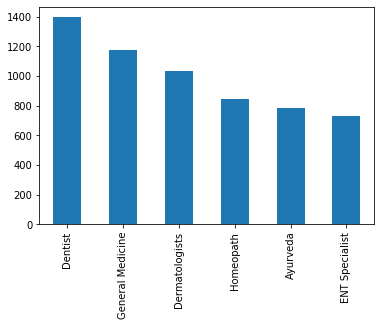

In [150]:
train['Profile'].value_counts().plot.bar()

In [151]:
train['Degree_1'].value_counts()

mbbs                                                                   1537
bds                                                                    1352
bams                                                                    751
bhms                                                                    747
diplomainotorhinolaryngology(dlo)                                       242
ddvl                                                                    154
ddv                                                                     129
diplomaindermatology                                                     58
dnb-dermatology&venereology                                              58
dnb-ent                                                                  58
dhms(diplomainhomeopathicmedicineandsurgery)                             37
dnb-generalmedicine                                                      34
dvd                                                                      33
dnb         

In [152]:
# binning required

In [153]:
# train['Degree_1'].value_counts().plot.bar()

In [154]:
train['Degree_2'].value_counts()

nan                                                                                      1962
mbbs                                                                                      940
md-dermatology                                                                            417
ms-ent                                                                                    262
md-generalmedicine                                                                        215
md-homeopathy                                                                             141
md-ayurvedamedicine                                                                       109
mds-conservativedentistry&endodontics                                                      89
mds-oral&maxillofacialsurgery                                                              76
mds                                                                                        75
md-medicine                                                 

In [ ]:
# binning required in all degrees

In [155]:
# train['Degree_2'].value_counts().plot.bar()

In [156]:
train['Degree_3'].value_counts()

nan                                                                              4591
mbbs                                                                              257
venereology&leprosy                                                               198
md-dermatology                                                                    125
ms-ent                                                                            105
md-generalmedicine                                                                 44
ms-otorhinolaryngology                                                             29
postgraduatediplomaindiabetology(pgdd)                                             21
md-internalmedicine                                                                20
ms-generalsurgery                                                                  19
md-homeopathy                                                                      15
mds-oral&maxillofacialsurgery                         

In [157]:
# train['Degree_3'].value_counts().plot.bar()

In [158]:
train['Degree_4'].value_counts()

nan                                                                                   5589
mbbs                                                                                    58
venereology&leprosy                                                                     55
md-dermatology                                                                          33
ms-ent                                                                                  23
md-generalmedicine                                                                      12
ms-generalsurgery                                                                        9
mrcp(uk)                                                                                 6
ms-otorhinolaryngology                                                                   6
vd&leprosy                                                                               5
mds-oral&maxillofacialsurgery                                                            5

In [161]:
# remove degree_4 and degre_5

In [159]:
# train['Degree_4'].value_counts().plot.bar()

In [160]:
train['Degree_5'].value_counts()

nan                                                                 5845
venereology&leprosy                                                   24
mbbs                                                                  11
md-generalmedicine                                                     7
ms-otorhinolaryngology                                                 4
md-dermatology                                                         4
ms-ent                                                                 4
postgraduatediplomaindiabetology(pgdd)                                 3
md-alternatemedicine                                                   3
pgde(cosmetic&estheticdentist)                                         2
mrcps                                                                  2
cvd                                                                    2
ms-orthopaedics                                                        2
diplomaintrichology-cosmetology                    

In [162]:
# train['Degree_5'].value_counts().plot.bar()

In [163]:
train['Rating_miss'].value_counts()

1    3302
0    2659
Name: Rating_miss, dtype: int64

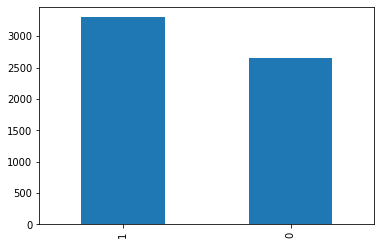

In [164]:
train['Rating_miss'].value_counts().plot.bar()

In [165]:
train['locality'].value_counts()

HSR Layout                  75
Andheri West                70
Dwarka                      68
Banjara Hills               64
Mulund West                 54
Borivali West               52
Kandivali West              50
Indiranagar                 48
Malad West                  47
Malleswaram                 47
Whitefield                  47
Pitampura                   45
Andheri East                43
Vileparle West              43
Powai                       42
Jubilee Hills               40
Bannerghatta Road           39
Marathahalli                39
Bandra West                 38
Ghatkopar East              38
Kondapur                    38
Janak Puri                  37
Rohini                      37
Secunderabad                37
Adyar                       37
Paschim Vihar               36
Shalimar Bagh               36
KPHB                        35
Koramangala                 35
Kukatpally                  34
R.S. Puram                  34
Old Rajendra Nagar          34
Madhapur

In [166]:
# train['locality'].value_counts().plot.bar()

In [167]:
train['city'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
nan                      26
 Sector 5                 1
Name: city, dtype: int64

In [168]:
# binning required

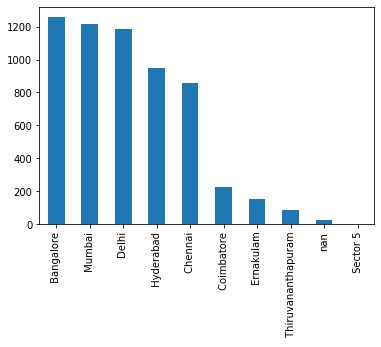

In [169]:
train['city'].value_counts().plot.bar()

In [170]:
train['number_of_feed'].value_counts()

0       4460
3         76
4         75
5         67
1         63
8         58
2         53
7         50
9         47
11        47
10        45
6         44
12        42
13        39
14        34
19        31
17        30
15        29
16        25
18        24
21        20
29        20
20        19
28        18
23        17
26        15
35        14
39        14
24        14
33        12
27        12
25        12
36        11
37        10
42         9
44         9
40         9
32         9
31         9
22         9
47         8
45         8
48         8
43         8
72         8
51         7
46         7
38         7
34         7
49         7
55         6
54         6
30         6
82         5
109        5
65         5
53         5
64         5
60         5
83         4
59         4
78         4
52         4
50         4
56         4
180        4
98         4
80         4
94         4
62         3
86         3
41         3
92         3
74         3
70         3
66         3
68         3

In [201]:
# we'll only apply binning to city
# then, after seeing some results we'll try to reduce the dimensionality by removing
# all the degrees and locality coz there are lot of unique values in them

In [202]:
# we don't have any criteria to merge different classes, so we won't use binning

In [320]:
train['city']=train['city'].str.replace(' Sector 5','nan')

In [321]:
# train['city'].value_counts()

In [322]:
test['city']=test['city'].str.replace(' Sector 5','nan')

# Bivariate Analysis

In [208]:
train.columns

Index(['Experience', 'Rating', 'Profile', 'Fees', 'Degree_1', 'Degree_2', 'Degree_3', 'Degree_4', 'Degree_5', 'Rating_miss', 'locality', 'city', 'number_of_feed'], dtype='object')

In [209]:
train.groupby('city').mean()[['Fees']]

,Fees
city,
Bangalore,328.842607
Chennai,283.602339
Coimbatore,154.298246
Delhi,363.006757
Ernakulam,188.431373
Hyderabad,307.507886
Mumbai,308.292863
Thiruvananthapuram,167.267442
nan,112.962963


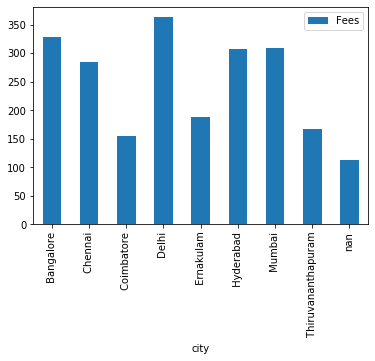

In [212]:
train.groupby('city').mean()[['Fees']].plot.bar()

In [210]:
train.groupby('Profile').mean()[['Fees']]

,Fees
Profile,
Ayurveda,238.968193
Dentist,238.199714
Dermatologists,393.133462
ENT Specialist,387.321429
General Medicine,313.908781
Homeopath,306.499407


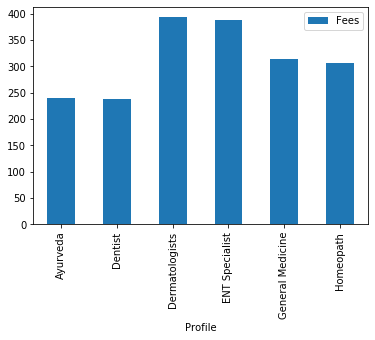

In [213]:
train.groupby('Profile').mean()[['Fees']].plot.bar()

In [211]:
train.groupby('Rating_miss').mean()[['Fees']]

,Fees
Rating_miss,
0,342.890184
1,279.804058


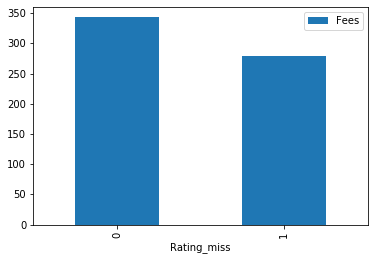

In [214]:
train.groupby('Rating_miss').mean()[['Fees']].plot.bar()

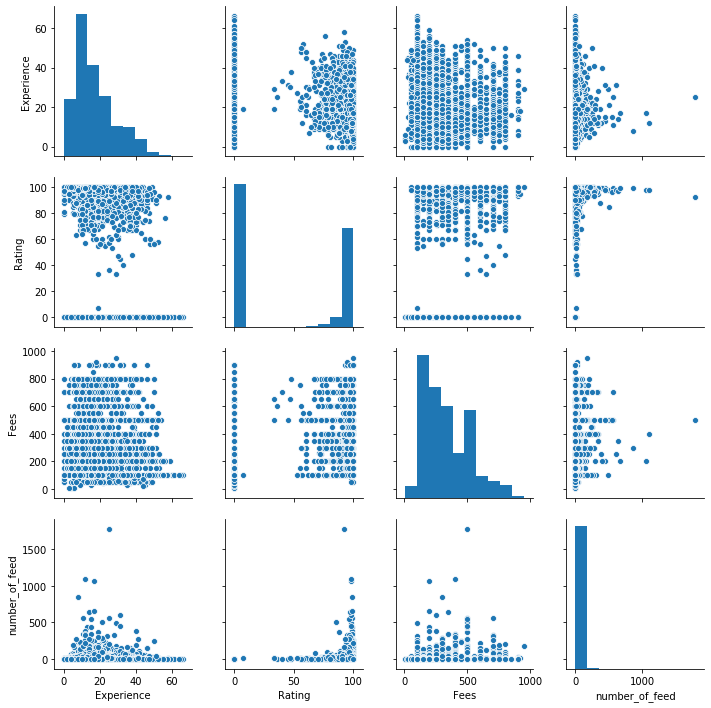

In [216]:
sns.pairplot(train,vars=['Experience','Rating','Fees','number_of_feed'])

# Encoding

In [323]:
from sklearn.preprocessing import LabelEncoder
def le(df,col):
    lab=LabelEncoder()
    df[col]=pd.Series(lab.fit_transform(df[col]))

In [324]:
# drop degree 4 and 5
# train.drop(['Degree_4','Degree_5'],axis=1,inplace=True)
# test.drop(['Degree_4','Degree_5'],axis=1,inplace=True)

In [325]:
train.dtypes

Experience         int64
Rating             int64
Profile           object
Fees               int64
Degree_1          object
Degree_2          object
Degree_3          object
Degree_4          object
Degree_5          object
Rating_miss        int64
locality          object
city              object
number_of_feed     int64
dtype: object

In [326]:
le(train,'Profile')
le(train,'Degree_1')
le(train,'Degree_2')
le(train,'Degree_3')
le(train,'Degree_4')
le(train,'Degree_5')
le(train,'locality')
le(train,'city')

In [327]:
le(test,'Profile')
le(test,'Degree_1')
le(test,'Degree_2')
le(test,'Degree_3')
le(test,'Degree_4')
le(test,'Degree_5')
le(test,'locality')
le(test,'city')

# Comparison of two data sets

In [328]:
train.head(10)

,Experience,Rating,Profile,Fees,Degree_1,Degree_2,Degree_3,Degree_4,Degree_5,Rating_miss,locality,city,number_of_feed
0,24,100,5,100,26,330,226,90,38,0,296,4,16
1,12,98,0,350,22,316,226,90,38,0,855,0,76
2,9,0,3,300,246,411,226,90,38,1,452,0,0
3,12,0,0,250,22,12,226,90,38,1,68,0,0
4,20,100,0,250,22,422,226,90,38,0,335,1,4
5,8,0,0,100,22,422,226,90,38,1,604,1,0
6,42,0,5,200,26,422,226,90,38,1,324,3,0
7,10,99,1,200,24,422,226,90,38,0,33,0,0
8,14,0,4,100,246,327,226,90,38,1,540,5,0
9,23,0,1,100,24,11,226,90,38,1,39,4,0


In [329]:
test.head(10)

,Experience,Rating,Profile,Degree_1,Degree_2,Degree_3,Degree_4,Degree_5,Rating_miss,locality,city,number_of_feed
0,35,0,4,136,224,103,36,16,1,142,6,0
1,31,0,3,60,148,103,36,16,1,577,5,0
2,40,70,2,32,148,103,36,16,0,212,1,4
3,0,0,0,9,224,103,36,16,1,373,3,0
4,16,100,1,11,186,103,36,16,0,231,0,0
5,14,90,1,11,184,103,36,16,0,552,1,0
6,23,94,3,60,148,103,36,16,0,134,0,6
7,9,94,1,11,198,103,36,16,0,31,5,0
8,11,99,0,9,135,53,54,16,0,48,0,203
9,44,0,5,13,224,103,36,16,1,323,3,0


# Distribution and corr

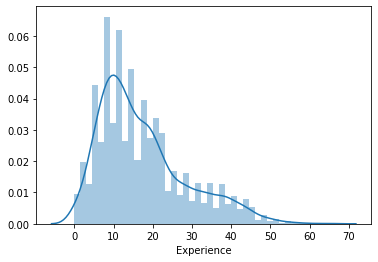

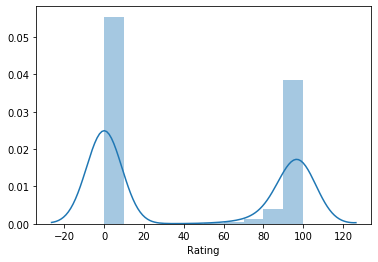

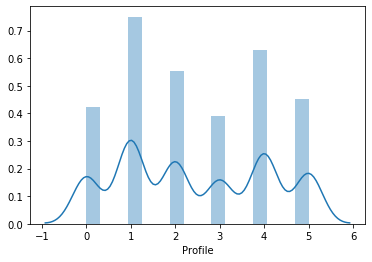

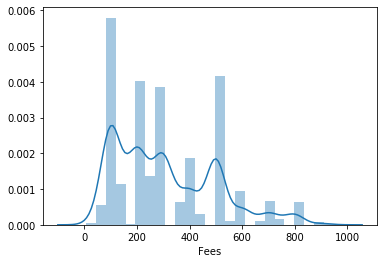

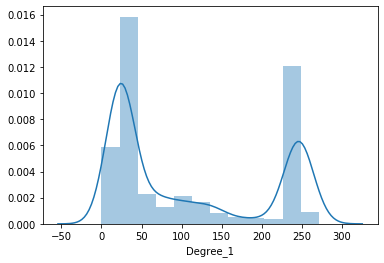

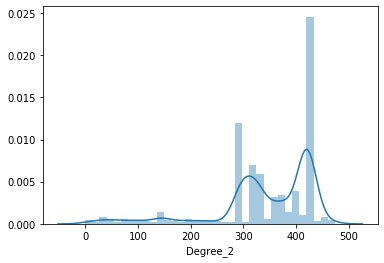

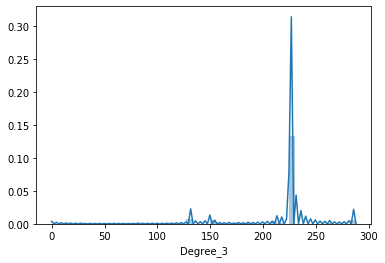

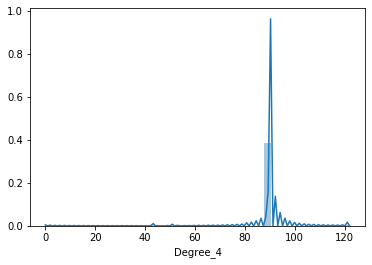

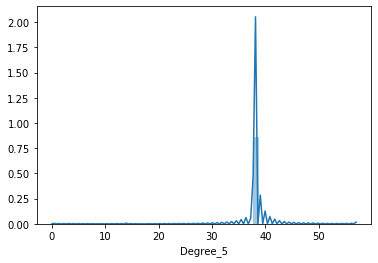

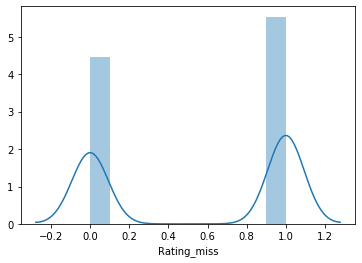

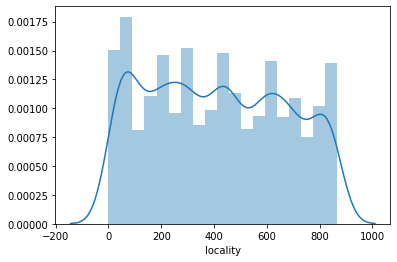

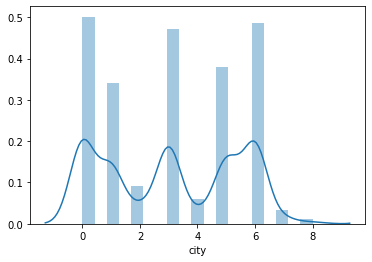

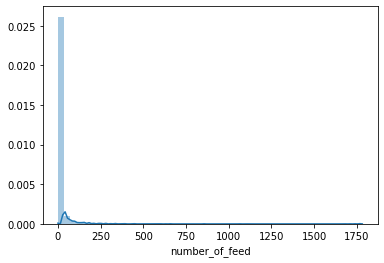

In [330]:
cols=train.columns.values
# Distplot
for i in cols:
    plt.subplots()
    sns.distplot(train[i])

In [331]:
train.skew()

Experience         0.991089
Rating             0.247186
Profile            0.108803
Fees               0.751870
Degree_1           0.550342
Degree_2          -1.533785
Degree_3          -2.365631
Degree_4          -4.391701
Degree_5          -5.630812
Rating_miss       -0.217056
locality           0.112887
city               0.011154
number_of_feed    15.549903
dtype: float64

In [332]:
# Experience,number_of_feed

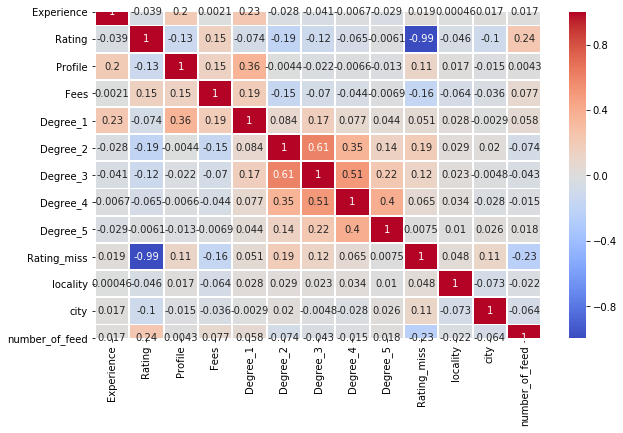

In [333]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(),annot=True,cmap='coolwarm',linewidths=0.8)

In [334]:
# corr in degree 2 and 3

# Outliers

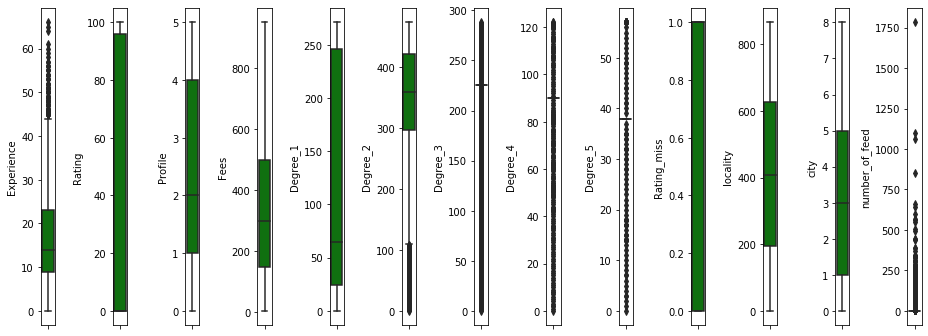

In [335]:
plt.figure(figsize=(13,60))
for i in range(len(cols)):
    plt.subplot(13,13,i+1)
    sns.boxplot(train[cols[i]], color='green', orient='v')
    plt.tight_layout()

In [231]:
# outliers in exp, number of feed

In [336]:
from scipy.stats import zscore
z=np.abs(zscore(train))
len(np.where(z>3)[0])

767

In [337]:
trainz=train.copy()

In [338]:

train=train[(z<3).all(axis=1)]
train.shape

(5456, 13)

In [339]:
from scipy.stats import zscore
z=np.abs(zscore(test))
len(np.where(z>3)[0])

195

In [340]:
testz=test.copy()

In [341]:

test=test[(z<3).all(axis=1)]
test.shape

(1852, 12)

# Definitions

In [342]:
# this is a regression problem

In [343]:
# lets seperate x and y

In [344]:
x=train.drop('Fees',axis=1)
y=train['Fees']
xtest=test.copy()

In [243]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [244]:
lr=LinearRegression(n_jobs=-1)
rid=Ridge(random_state=45)
ls=Lasso(random_state=45)
dt=DecisionTreeRegressor(random_state=45)
svr=SVR()
knn=KNeighborsRegressor(n_jobs=-1)
rf=RandomForestRegressor(n_jobs=-1,random_state=45)
gb=GradientBoostingRegressor(random_state=45)
xgb=XGBRegressor(n_jobs=-1,random_state=45)
ada=AdaBoostRegressor(random_state=45)

In [367]:
# Now, let's define some functions to reuse them
def fit(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    
def get_score(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    return train_score,test_score,rmse

def get_pred(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    return pred

def get_metrics(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    mse=mean_squared_error(pred,y_test)
    mae=mean_absolute_error(pred,y_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    return mse,rmse,mae

from sklearn.model_selection import GridSearchCV
def gridcv(m,p,x,y):
    gkb=GridSearchCV(m,p,n_jobs=-1,cv=4,verbose=5,scoring='neg_mean_squared_error')
    gkb.fit(x,y)
    return gkb.best_params_


from sklearn.model_selection import RandomizedSearchCV
def randomcv(m,p,x,y):
    from sklearn.model_selection import RandomizedSearchCV
    gkb=RandomizedSearchCV(estimator=m,param_distributions=p,
                          cv=4,n_iter=100,scoring='neg_mean_squared_error',
                          n_jobs=-1, verbose=5,return_train_score=True,random_state=45)
    gkb.fit(x,y)
    return gkb.best_params_

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
def bfe(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, verbose=3, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    return xbfe

def ffs(m,x,y,k):
    sf=sfs(m, k_features=k, forward=True, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xffs=x[feat_names]
    return xffs

from sklearn.decomposition import PCA
def nforpca(x):
    pca=PCA().fit(x)
    plt.figure()
    plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
    plt.xlabel('No of Components')
    plt.ylabel('Variance')
    plt.axhline(y=95, color='r', linestyle='--')
    plt.show()
    
def pca(m,x,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    return xpca


def cross(m,x,y,c=5):
    score=cross_val_score(m,x,y,cv=c,n_jobs=-1,scoring='r2')
    return (score.mean(), score.std())

from sklearn.preprocessing import StandardScaler
def std(x):
    scx=StandardScaler()
    xs=pd.DataFrame(scx.fit_transform(x), columns=x.columns)
    return xs

from sklearn.preprocessing import MinMaxScaler
def mmc(x):
    mm=MinMaxScaler()
    xm=pd.DataFrame(mm.fit_transform(x), columns=x.columns)
    return xm

def modified_bfe(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    x_train, x_test, y_train, y_test=train_test_split(xbfe,y,test_size=0.25,random_state=45)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    return test_score,rmse

def modified_ffs(m,x,y,k):
    sf=sfs(m, k_features=k, forward=True, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xffs=x[feat_names]
    x_train, x_test, y_train, y_test=train_test_split(xffs,y,test_size=0.25,random_state=45)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    return test_score

def modified_pca(m,x,y,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    x_train, x_test, y_train, y_test=train_test_split(xpca,y,test_size=0.25,random_state=45)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    return test_score

def tts(x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    return x_train, x_test, y_train, y_test

# Iteration A

In [345]:
x.head()

,Experience,Rating,Profile,Degree_1,Degree_2,Degree_3,Degree_4,Degree_5,Rating_miss,locality,city,number_of_feed
0,24,100,5,26,330,226,90,38,0,296,4,16
1,12,98,0,22,316,226,90,38,0,855,0,76
2,9,0,3,246,411,226,90,38,1,452,0,0
4,20,100,0,22,422,226,90,38,0,335,1,4
5,8,0,0,22,422,226,90,38,1,604,1,0


In [346]:
print("LR ", get_score(lr,x,y))
print("RID ", get_score(rid,x,y))
print("LS ", get_score(ls,x,y))
print("DT ", get_score(dt,x,y))
print("SVR ", get_score(svr,x,y))
print("KNN ", get_score(knn,x,y))
print("RF ", get_score(rf,x,y))
print("GB ", get_score(gb,x,y))
print("XGB ", get_score(xgb,x,y))

LR  (0.1247212917527364, -6.02014885513376, 178.89644306079194)
RID  (0.12469276018217244, -6.072556376742184, 178.88778367609768)
LS  (0.11993559042465775, -6.5803293606890545, 179.17805478249093)
DT  (0.9976906217138326, -0.49730822174482636, 230.37546810584095)
SVR  (0.009681635426089796, -21556.3314079631, 187.18829655374452)
KNN  (0.3519203256801089, -2.021769865756987, 188.16658643924913)
RF  (0.8377128166893504, -1.6581015594807824, 180.6537702927905)
GB  (0.2948119054718905, -3.0157008632260895, 168.9516489020188)
XGB  (0.787452412772951, -1.1410374717864458, 173.9054803389131)


In [248]:
# all the models are over fitting a lot

# Iteration B

In [347]:
x1=x.drop('locality',axis=1)

In [348]:
print("LR ", get_score(lr,x1,y))
print("RID ", get_score(rid,x1,y))
print("LS ", get_score(ls,x1,y))
print("DT ", get_score(dt,x1,y))
print("SVR ", get_score(svr,x1,y))
print("KNN ", get_score(knn,x1,y))
print("RF ", get_score(rf,x1,y))
print("GB ", get_score(gb,x1,y))
print("XGB ", get_score(xgb,x1,y))

LR  (0.12129320352945416, -6.278768969414957, 179.2287514488509)
RID  (0.12126374600084087, -6.336096504455479, 179.2208104473478)
LS  (0.11636272337744047, -6.890285481742131, 179.52552536065696)
DT  (0.912319283870793, -0.5114442563189332, 232.26106806087716)
SVR  (0.029180928604052525, -385.3744099572141, 185.54105763559167)
KNN  (0.3736861730424579, -1.8237738131149919, 186.27591051638876)
RF  (0.7693003927168385, -1.3803697689159362, 186.9549288617373)
GB  (0.27453513753335324, -3.0850707899174727, 170.2046570840545)
XGB  (0.6567027008737853, -1.551930135944334, 176.87762407553632)


In [349]:
# score didn't improved

In [351]:
# lets scale the data
xs=std(x)

In [353]:
# now, lets apply bfe
for i in range(3,13):
    print(i," ",modified_bfe(rf,x,y,i))

3   -0.9260010250861017
4   -1.2341158857138366
5   -1.2538430864094043
6   -1.338386453566284
7   -1.4317306195179582
8   -1.352016999381592
9   -1.3927826439385482
10   -1.3136891550343348
11   -1.556690174820769
12   -1.6581015594807824


In [354]:
# now, lets apply bfe
for i in range(3,13):
    print(i," ",modified_bfe(dt,x,y,i))

3   -2.8739936904098164
4   -2.874477406087127
5   -2.8499607073629423
6   -2.1308703504153823
7   -1.347054202227171
8   -0.9891838701168139
9   -0.8960380152483025
10   -0.7131153665996817
11   -0.4781917375503957
12   -0.49730822174482636


# Iteration D

In [364]:
print("LR ", get_score(lr,xs,y))
print("RID ", get_score(rid,xs,y))
print("LS ", get_score(ls,xs,y))
print("DT ", get_score(dt,xs,y))
print("SVR ", get_score(svr,xs,y))
print("KNN ", get_score(knn,xs,y))
print("RF ", get_score(rf,xs,y))
print("GB ", get_score(gb,xs,y))
print("XGB ", get_score(xgb,xs,y))

LR  (0.1247212917527365, -6.020148855133776, 178.8964430607919)
RID  (0.12471553499356136, -6.043668521729876, 178.8914244334216)
LS  (0.12167309900340606, -6.894903482738191, 178.80728525712672)
DT  (0.9976906217138326, -0.5045537860386882, 231.61500440154913)
SVR  (0.06656166025666166, -23.818916493178858, 183.41410770493513)
KNN  (0.3647390805121573, -1.7807800847445363, 183.94724444525644)
RF  (0.8383237872606848, -1.6479245970497738, 179.93855940537875)
GB  (0.2948119054718905, -3.0175504557694905, 168.95977492325636)
XGB  (0.787452412772951, -1.1347095247973429, 173.74874466829354)


In [361]:
x2=xs.copy()

In [362]:
x2.drop(['Degree_3','Degree_4','Degree_5'],axis=1,inplace=True)

In [363]:
print("LR ", get_score(lr,x2,y))
print("RID ", get_score(rid,x2,y))
print("LS ", get_score(ls,x2,y))
print("DT ", get_score(dt,x2,y))
print("SVR ", get_score(svr,x2,y))
print("KNN ", get_score(knn,x2,y))
print("RF ", get_score(rf,x2,y))
print("GB ", get_score(gb,x2,y))
print("XGB ", get_score(xgb,x2,y))

LR  (0.12403015278803675, -6.045778419298034, 178.8189836964385)
RID  (0.12402438205269128, -6.069676618043311, 178.8133421584976)
LS  (0.12110241094225671, -6.898447724761696, 178.79146703824912)
DT  (0.9976555034308922, -0.4755386824479222, 232.7576001764125)
SVR  (0.07054765861789491, -21.804286932371127, 182.8902314408642)
KNN  (0.372193322367391, -1.7118425916960067, 183.1816780014454)
RF  (0.8387924308451209, -1.5480445310965827, 181.96075820426438)
GB  (0.29233316528330733, -3.0462945391054452, 168.9189146519573)
XGB  (0.7787212587426166, -1.1367027699973735, 172.66585242375572)


In [365]:
# there is no use of dropping any columns

In [366]:
# lets tune gb coz it is performing the best in terms of error

In [368]:
# now, lets apply bfe
for i in range(3,13):
    print(i," ",modified_bfe(gb,xs,y,i))

3   (-3.879427489049222, 169.48307109538462)
4   (-3.3593831446506446, 171.5851325484246)
5   (-3.1500352149424398, 170.38125191437578)
6   (-2.913361171592422, 169.0322710659493)
7   (-2.9360240354927654, 168.91156769938456)
8   (-2.9747480252440743, 169.27079949914182)
9   (-2.9955046130555694, 169.04765239051025)
10   (-3.05945838554163, 169.61784168288818)
11   (-3.069215592557269, 169.78966515341128)
12   (-3.0175504557694905, 168.95977492325636)


In [369]:
xsbfe1=bfe(gb,xs,y,7)
xsbfe1.head()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:    6.0s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.1s finished

[2020-03-28 15:03:34] Features: 11/7 -- score: 0.21428409700876622[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    3.6s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    5.1s finished

[2020-03-28 15:03:39] Features: 10/7 -- score: 0.2157555641389785[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    3.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.5s finished

[2020-03-28 15:03:44] Features: 9/7 -- score: 0.218079969946039[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   9 

,Experience,Profile,Degree_2,Degree_5,Rating_miss,locality,city
0,0.631077,1.525945,-0.354130,0.007237,-1.163945,-0.465301,0.398636
1,-0.470762,-1.467783,-0.536966,0.007237,-1.163945,1.718233,-1.336473
2,-0.746222,0.328454,0.703708,0.007237,0.859147,0.144057,-1.336473
3,0.263797,-1.467783,0.847365,0.007237,-1.163945,-0.312962,-0.902695
4,-0.838042,-1.467783,0.847365,0.007237,0.859147,0.737791,-0.902695


In [382]:
# lets cross validate
for i in range(2,25):
    print(i," ",cross(gb,xsbfe1,y,i))

2   (0.2125190066578202, 0.005655486024994882)
3   (0.21608110502371383, 0.009209865690857005)
4   (0.21593100162999304, 0.005238510095073015)
5   (0.21975498076917904, 0.010810383581799128)
6   (0.21833858014873497, 0.009338989456469785)
7   (0.2168150732509794, 0.018811880511843924)
8   (0.21889775837462827, 0.01924185979209145)
9   (0.219156178369606, 0.013340164915319946)
10   (0.21742378749654426, 0.02499755554462615)
11   (0.21962839755595828, 0.028745950649030447)
12   (0.21939626527722034, 0.02626177240354356)
13   (0.22080451771820137, 0.031112402575218752)
14   (0.2167874472710947, 0.028896625399846953)
15   (0.2196571834217035, 0.032226453143851516)
16   (0.22330338135268124, 0.025691347555747222)
17   (0.21818361547689424, 0.03653991801634608)
18   (0.22027433226782053, 0.03666999584998397)
19   (0.2193033894694376, 0.037940575806217)
20   (0.21924267689620186, 0.03421191838016356)
21   (0.21825204036452311, 0.037775248997637415)
22   (0.22043759401211951, 0.034644080319575

In [371]:
crosspred=cross_val_predict(gb,xsbfe1,y,cv=5)

In [372]:
# Evaluation metrics
mse=mean_squared_error(y,crosspred)
mae=mean_absolute_error(y,crosspred)
rmse=np.sqrt(mean_squared_error(y,crosspred))
print('Mean_Squared_Error: ', mse)
print('Root_Mean_Squared_Error: ', rmse)
print('Mean_Absolute_Error: ', mae)

Mean_Squared_Error:  27161.13440241866
Root_Mean_Squared_Error:  164.80635425376855
Mean_Absolute_Error:  129.77826039797182


In [373]:
# error decreased to 164

In [383]:
for i in range(2,25):
    print(i," ",cross(dt,x,y,i))

2   (-0.5693036377775058, 0.03774717937847094)
3   (-0.6158007316557376, 0.058771748147998404)
4   (-0.5544547219766036, 0.05838875765103094)
5   (-0.5656635107933576, 0.03670844317089241)
6   (-0.5559011654949961, 0.08025677915252628)
7   (-0.5198945952116268, 0.09409824361921305)
8   (-0.5353965390010647, 0.06526674652796906)
9   (-0.49021342028390413, 0.09664619416461251)
10   (-0.5822280727038998, 0.07003420469884326)
11   (-0.5062912713750556, 0.1271055129989542)
12   (-0.5270634092235661, 0.08147335826363211)
13   (-0.498630688232693, 0.0874021486856432)
14   (-0.5545199756745011, 0.15044979792029609)
15   (-0.5490796637279419, 0.11621976590307592)
16   (-0.49733522780360895, 0.10254100331782429)
17   (-0.5757608083807116, 0.1474582462809754)
18   (-0.5467430266049474, 0.1146121201126083)
19   (-0.5632422557464468, 0.12228942598710103)
20   (-0.5487461830153769, 0.10059564942685364)
21   (-0.5691005125101654, 0.12335853664045139)
22   (-0.5499274017228593, 0.13130625057221917)
23

In [384]:
for i in range(2,25):
    print(i," ",cross(lr,xs,y,i))

2   (0.10762763831297839, 0.005598763407646978)
3   (0.11265825892458499, 0.006117312787593266)
4   (0.1113078320461911, 0.011905830481905461)
5   (0.10890934907160699, 0.008331813571139214)
6   (0.11073823281845124, 0.016569167193223433)
7   (0.11021751071811751, 0.016423044703072768)
8   (0.11123472906132546, 0.01775424756904148)
9   (0.11046743169320594, 0.013413008221185584)
10   (0.10936960082879574, 0.01640112397849326)
11   (0.11042570376783577, 0.02004426994999668)
12   (0.10899462316016077, 0.025171125576126354)
13   (0.10954696563470938, 0.029629085987388046)
14   (0.10844951465550579, 0.02683430419948849)
15   (0.10901608265186971, 0.027540355641227452)
16   (0.10988584079952127, 0.02819983632520656)
17   (0.10936766410885897, 0.031531547255215474)
18   (0.10916650772734762, 0.030216985744229815)
19   (0.10817877848378087, 0.03344034109502021)
20   (0.10784121028003538, 0.03043465974123656)
21   (0.1087024417458817, 0.03394346378109113)
22   (0.10885087700336933, 0.029996603

In [385]:
for i in range(2,25):
    print(i," ",cross(rid,xs,y,i))

2   (0.10783636070101454, 0.005214273623421195)
3   (0.11267205649258401, 0.006128416314750857)
4   (0.1113471160302131, 0.01188413397367775)
5   (0.10891785536085194, 0.008317424766235695)
6   (0.11075958359282105, 0.01644357418509309)
7   (0.11022396012826403, 0.016399681034683387)
8   (0.11125152443174098, 0.017715734027923254)
9   (0.11049075268163519, 0.013375862525108872)
10   (0.10939342506849548, 0.0163550590023268)
11   (0.11044960017253529, 0.019966346913376884)
12   (0.1090167408093309, 0.02507569207469452)
13   (0.10956941654395552, 0.02954263939633315)
14   (0.10847737388440135, 0.026651805370989025)
15   (0.10903583042348795, 0.027450545623431882)
16   (0.10990866720202815, 0.02806190260237995)
17   (0.1093841482020996, 0.03145620880272147)
18   (0.10919073420587852, 0.030073808507507863)
19   (0.10819894372745478, 0.03333757383161439)
20   (0.10786291593017723, 0.030306814329876603)
21   (0.10872796760015599, 0.03381743242008307)
22   (0.10886480874787186, 0.029917673178

In [386]:
for i in range(2,25):
    print(i," ",cross(ls,xs,y,i))

2   (0.10770155493393185, 0.0030499958448049203)
3   (0.11060081324803168, 0.006627755183120017)
4   (0.10988971399329414, 0.01154055432409854)
5   (0.10702999920426323, 0.008573057050796574)
6   (0.10902896020326536, 0.014065194620538596)
7   (0.10810821009436096, 0.016344609605486442)
8   (0.10939311000782921, 0.01703925126257919)
9   (0.10874230341370948, 0.013275370832005542)
10   (0.10782028838649024, 0.01571094079509663)
11   (0.10891403704331344, 0.01879521908196635)
12   (0.10722483602691557, 0.022853879623654597)
13   (0.10795487609576605, 0.02711299492459495)
14   (0.10690110341577462, 0.0232704476489071)
15   (0.10737810819312076, 0.025785349979432808)
16   (0.10836753779055314, 0.02541292143267059)
17   (0.10738603626851288, 0.029494416908460334)
18   (0.10776859701615407, 0.02652419834574297)
19   (0.10661330432460611, 0.03122696913167589)
20   (0.10623894705699985, 0.027758933281800992)
21   (0.10714553006395923, 0.03130127192021926)
22   (0.10703533072221273, 0.028028981

In [378]:
for i in range(2,15):
    print(i," ",cross(svr,xs,y,i))

2   (0.049437876288798865, 0.001669871917144572)
3   (0.05438062415112266, 0.00947881527066349)
4   (0.058160029573833066, 0.01045147986173544)
5   (0.05797501427165628, 0.016284946715026886)
6   (0.05932977860949681, 0.020278143676347695)
7   (0.0599396581412878, 0.024591901274103118)
8   (0.0619188673383312, 0.01797252543523353)
9   (0.06126357724241866, 0.022335295250922708)
10   (0.06105687006637408, 0.020278628151224744)
11   (0.06184086165848337, 0.020019458346555035)
12   (0.06031554824610097, 0.02942865773109567)
13   (0.061837884996616764, 0.02805984201715523)
14   (0.061134755837568736, 0.027743956018698165)


In [379]:
for i in range(2,15):
    print(i," ",cross(knn,xs,y,i))

2   (0.01621935880416331, 0.0018848117851167356)
3   (0.01974291907550622, 0.01972847745649669)
4   (0.029682433905741684, 0.01554156276538887)
5   (0.015451210173671459, 0.022011765281117392)
6   (0.035782994053181416, 0.017550471416057704)
7   (0.025915893151932386, 0.040090010494112406)
8   (0.03488201888523572, 0.023944704652728015)
9   (0.03337335579405661, 0.036235045143058114)
10   (0.02800309022545534, 0.04298584581695577)
11   (0.03631097191888137, 0.041853103306603925)
12   (0.036871722847740096, 0.04474967080278223)
13   (0.038028115067262294, 0.06093830110606006)
14   (0.02945027039663221, 0.053604144903380016)


In [380]:
for i in range(2,15):
    print(i," ",cross(rf,xs,y,i))

2   (0.08871726788728146, 0.0008508728204915106)
3   (0.10298904551651107, 0.025339950947974563)
4   (0.11225763727472804, 0.03075888763166387)
5   (0.09836429377156375, 0.03214605651063028)
6   (0.12443712140010214, 0.03256260618476908)
7   (0.12096446679471372, 0.043761441584089504)
8   (0.11175393730049546, 0.022606598708356407)
9   (0.12055860317875168, 0.019379129411783255)
10   (0.10450222225158919, 0.03392565911111146)
11   (0.11852061928448432, 0.03762629456138554)
12   (0.11143993608466342, 0.03855250183637023)
13   (0.11489568032601104, 0.040417128461894054)
14   (0.11074899223408911, 0.040587427776586735)


In [387]:
for i in range(2,25):
    print(i," ",cross(xgb,xs,y,i))

2   (0.11514719321374439, 0.011673416981303142)
3   (0.15936881882527174, 0.017621675512408307)
4   (0.17495263628755797, 0.030484710037754107)
5   (0.18320878354168033, 0.03400338710463162)
6   (0.1871326293630394, 0.037001917125886505)
7   (0.17953469140205655, 0.03676689404781823)
8   (0.18111483280382806, 0.035636163195944225)
9   (0.1873710017315312, 0.043306792169472176)
10   (0.17744434473753046, 0.04987523112338453)
11   (0.1915162272757468, 0.034852864548362075)
12   (0.18502659730328955, 0.04435417791307347)
13   (0.1850584669554799, 0.04789441590730399)
14   (0.17899177768663252, 0.06099490151784063)
15   (0.19349567202619308, 0.06251621942588823)
16   (0.18558649963851245, 0.060571920249141396)
17   (0.19622182404115038, 0.06852779915520973)
18   (0.18278932547859542, 0.062037284101654315)
19   (0.18567702082777146, 0.0637881979080054)
20   (0.17925846438950005, 0.0649649603888828)
21   (0.17537691429978236, 0.05620739537333359)
22   (0.18208569738985012, 0.0551768729666377

In [388]:
# lets try everything with rid and gb

# Rid

In [389]:
# with xs

In [390]:
# lets try deleting some features

In [391]:
xsr=xs.copy()

In [392]:
# first, try bfe

In [393]:
for i in range(3,13):
    print(i," ",modified_bfe(rid,xs,y,i))

3   (-8.00821564869054, 179.1246273505089)
4   (-7.242145822349123, 178.88780660791218)
5   (-6.713580580857904, 179.22172041909215)
6   (-6.44270351992666, 178.84802081453125)
7   (-6.147592337869996, 178.72174843401234)
8   (-6.102870222065301, 178.6330823316374)
9   (-6.075646922161938, 178.55686599356667)
10   (-6.042589642510634, 178.73997527380476)
11   (-6.0557356732999805, 178.82931158008444)
12   (-6.043668521729876, 178.8914244334216)


In [394]:
# performing best at 9

In [396]:
xsbrid=bfe(rid,xs,y,9)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2020-03-28 18:39:47] Features: 11/9 -- score: 0.10961600191560177[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2020-03-28 18:39:48] Features: 10/9 -- score: 0.11023805575288168[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2020-03-28 18:39:4

In [397]:
xsbrid.head()

,Experience,Rating,Profile,Degree_1,Degree_2,Degree_5,Rating_miss,locality,number_of_feed
0,0.631077,1.274263,1.525945,-0.844663,-0.354130,0.007237,-1.163945,-0.465301,0.542685
1,-0.470762,1.231702,-1.467783,-0.885242,-0.536966,0.007237,-1.163945,1.718233,3.795579
2,-0.746222,-0.853780,0.328454,1.387185,0.703708,0.007237,0.859147,0.144057,-0.324753
3,0.263797,1.274263,-1.467783,-0.885242,0.847365,0.007237,-1.163945,-0.312962,-0.107893
4,-0.838042,-0.853780,-1.467783,-0.885242,0.847365,0.007237,0.859147,0.737791,-0.324753


In [398]:
# now, lets cross validate from 2 to 9
for i in range(2,10):
    print(i," ",cross(rid,xsbrid,y,i))

2   (0.11041510451279646, 0.003919831964534937)
3   (0.11403723196513434, 0.005597438143638542)
4   (0.11255297890759136, 0.01112338575855488)
5   (0.11055942566927701, 0.008509091251469016)
6   (0.11183854925715082, 0.016843684112665257)
7   (0.11103591310099929, 0.017168589382645507)
8   (0.11207704534451456, 0.017833308731550677)
9   (0.11159643639320288, 0.013497585013152152)


In [399]:
# max score at cv=3
# the score has improved a little

In [400]:
# lets first tune rid with xsbrid

In [401]:
Ridge?

In [406]:
param_rid={'alpha':[0.1,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]}
gridcv(rid,param_rid,xsbrid,y)

Fitting 4 folds for each of 11 candidates, totalling 44 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  44 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    0.2s finished


{'alpha': 4}

In [407]:
rid1=Ridge(alpha=4)

In [408]:
for i in range(2,10):
    print(i," ",cross(rid1,xsbrid,y,i))

2   (0.11078042388511539, 0.0031075967377766633)
3   (0.11401394478259581, 0.005654075309811322)
4   (0.11260018302880334, 0.01106369422685626)
5   (0.11053981669902013, 0.008488753922143037)
6   (0.11185374234522495, 0.016541147057591434)
7   (0.11101515824499852, 0.017110336861505884)
8   (0.11208272882700972, 0.01772712154972727)
9   (0.11161916504896463, 0.013422013712883677)


In [409]:
# score improved a little at cv=3

In [415]:
# lets try to boost it
adadt=AdaBoostRegressor(base_estimator=rid1, random_state=45, n_estimators=50, learning_rate=0.001)
cross(adadt,xsbrid,y,3)

(0.11425263317343744, 0.005635407323968664)

In [416]:
# now, lets finally check rmse on it

In [417]:
crosspredrid=cross_val_predict(adadt,xsbrid,y,cv=3)

In [418]:
# Evaluation metrics
mse=mean_squared_error(y,crosspredrid)
mae=mean_absolute_error(y,crosspredrid)
rmse=np.sqrt(mean_squared_error(y,crosspredrid))
print('Mean_Squared_Error: ', mse)
print('Root_Mean_Squared_Error: ', rmse)
print('Mean_Absolute_Error: ', mae)

Mean_Squared_Error:  30875.172547959333
Root_Mean_Squared_Error:  175.71332490155473
Mean_Absolute_Error:  142.40570217993005


In [419]:
# the error reduced from 178

# GB

In [420]:
# lets apply bfe

In [421]:
# we've already applied bfe
# xsbfe1=bfe(gb,xs,y,7)
# xsbfe1.head()
# best score was at k=7

In [423]:
for i in range(2,25):
    print(i," ",cross(gb,xsbfe1,y,i))

2   (0.2125190066578202, 0.005655486024994882)
3   (0.21608110502371383, 0.009209865690857005)
4   (0.21593100162999304, 0.005238510095073015)
5   (0.21975498076917904, 0.010810383581799128)
6   (0.21833858014873497, 0.009338989456469785)
7   (0.2168150732509794, 0.018811880511843924)
8   (0.21889775837462827, 0.01924185979209145)
9   (0.219156178369606, 0.013340164915319946)
10   (0.21742378749654426, 0.02499755554462615)
11   (0.21962839755595828, 0.028745950649030447)
12   (0.21939626527722034, 0.02626177240354356)
13   (0.22080451771820137, 0.031112402575218752)
14   (0.2167874472710947, 0.028896625399846953)
15   (0.2196571834217035, 0.032226453143851516)
16   (0.22330338135268124, 0.025691347555747222)
17   (0.21818361547689424, 0.03653991801634608)
18   (0.22027433226782053, 0.03666999584998397)
19   (0.2193033894694376, 0.037940575806217)
20   (0.21924267689620186, 0.03421191838016356)
21   (0.21825204036452311, 0.037775248997637415)
22   (0.22043759401211951, 0.034644080319575

In [424]:
cross(gb,xsbfe1,y,16)

(0.22330338135268124, 0.025691347555747222)

In [425]:
# lets tune gb with xsbfe1

In [429]:
GradientBoostingRegressor?

In [428]:
param_gb={'loss':['ls', 'lad', 'huber', 'quantile'],
          'max_features':['auto','sqrt','log2'],'warm_start':[True,False]}
gridcv(gb,param_gb,xsbfe1,y)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   13.0s finished


{'loss': 'ls', 'max_features': 'auto', 'warm_start': True}

In [430]:
gb1=GradientBoostingRegressor(random_state=45,max_features= 'auto', warm_start= True)

In [432]:
param_gb1={'learning_rate':[0.0001,0.001,0.01,0.1,1,2],'min_samples_split':[2,3,4,5,8],
          'min_samples_leaf':[1,2,3,4],'max_depth':[2,4,6,8,10,12],'alpha':[0.1,0.2,0.4,0.7,0.9]}
randomcv(gb1,param_gb1,xsbfe1,y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.4min finished


{'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': 4,
 'learning_rate': 0.1,
 'alpha': 0.7}

In [433]:
param_gb2={'learning_rate':[0.05,0.1,0.2,0.4,0.6],'min_samples_split':[2,3],
          'min_samples_leaf':[3,4,5],'max_depth':[2,3,4,5],'alpha':[0.1,0.2,0.4,0.7,0.9]}
randomcv(gb1,param_gb1,xsbfe1,y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   37.9s finished


{'min_samples_split': 3,
 'min_samples_leaf': 5,
 'max_depth': 5,
 'learning_rate': 0.1,
 'alpha': 0.7}

In [434]:
param_gb2={'learning_rate':[0.1,0.2,0.3],'min_samples_split':[2,3,4],
          'min_samples_leaf':[4,5,6,7],'max_depth':[4,5,6,7],'alpha':[0.3,0.4,0.5,0.6,0.7,0.8]}
randomcv(gb1,param_gb2,xsbfe1,y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.0min finished


{'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_depth': 6,
 'learning_rate': 0.1,
 'alpha': 0.3}

In [435]:
gb2=GradientBoostingRegressor(random_state=45,max_features= 'auto', warm_start= True,min_samples_split= 2,
 min_samples_leaf= 6,
 max_depth= 6,
 learning_rate= 0.1,
 alpha= 0.3)

In [437]:
param_gb3={'n_estimators':range(30,170,10)}
gridcv(gb2,param_gb3,xsbfe1,y)

Fitting 4 folds for each of 14 candidates, totalling 56 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    8.8s finished


{'n_estimators': 110}

In [438]:
gb3=GradientBoostingRegressor(random_state=45,max_features= 'auto', warm_start= True,min_samples_split= 2,
 min_samples_leaf= 6,
 max_depth= 6,
 learning_rate= 0.1,
 alpha= 0.3,n_estimators= 110)

In [439]:
cross(gb3,xsbfe1,y,16)

(0.2404492875702192, 0.03836918269229687)

In [440]:
# score improved

In [443]:
# lets try another trial of tuning
param_gb4={'learning_rate':[0.1,0.2,0.3,0.4],'min_samples_split':[2,3,4,5],
          'min_samples_leaf':[3,4,5,6,7],'max_depth':[4,5,6,7,8],'alpha':[0.2,0.3,0.4,0.5,0.6,0.7,0.8]}
randomcv(gb,param_gb4,xsbfe1,y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.1min finished


{'min_samples_split': 3,
 'min_samples_leaf': 4,
 'max_depth': 5,
 'learning_rate': 0.1,
 'alpha': 0.7}

In [444]:
gb4=GradientBoostingRegressor(random_state=45,min_samples_split= 3,
 min_samples_leaf= 4,
 max_depth= 5,
 learning_rate= 0.1,
 alpha= 0.7)

In [446]:
param_gb6={'n_estimators':range(80,200,10)}
gridcv(gb4,param_gb6,xsbfe1,y)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    8.5s finished


{'n_estimators': 180}

In [447]:
gb5=GradientBoostingRegressor(random_state=45,min_samples_split= 3,
 min_samples_leaf= 4,
 max_depth= 5,
 learning_rate= 0.1,
 alpha= 0.7,n_estimators=180)
cross(gb5,xsbfe1,y,16)

(0.24208625619972401, 0.03810459042141834)

In [448]:
# the score improved

In [441]:
# lets try to boost gb4,xsbfe1,y

In [449]:
adagb=AdaBoostRegressor(base_estimator=gb4, random_state=45, n_estimators=50, learning_rate=0.0001)
cross(adagb,xsbfe1,y,16)

(0.24661020895164443, 0.03127577309253523)

In [450]:
# took around 2 minutes

In [452]:
adagb=AdaBoostRegressor(base_estimator=gb4, random_state=45, n_estimators=50, learning_rate=0.01)
cross(adagb,xsbfe1,y,16)

(0.24558733323335147, 0.03175004822414221)

In [453]:
adagb=AdaBoostRegressor(base_estimator=gb4, random_state=45, n_estimators=100, learning_rate=0.0001)
cross(adagb,xsbfe1,y,16)

(0.24730921002575557, 0.03205558893351855)

In [457]:
adagb200=AdaBoostRegressor(base_estimator=gb4, random_state=45, n_estimators=200, learning_rate=0.0001)
cross(adagb200,xsbfe1,y,16)

(0.24742723450763832, 0.031827539617566195)

In [458]:
adagb1=AdaBoostRegressor(base_estimator=gb3, random_state=45, n_estimators=50, learning_rate=0.0001)
cross(adagb1,xsbfe1,y,16)

(0.2530618041307495, 0.0353315720186658)

In [459]:
crosspredgb=cross_val_predict(adagb1,xsbfe1,y,cv=16)

In [460]:
# Evaluation metrics
mse=mean_squared_error(y,crosspredgb)
mae=mean_absolute_error(y,crosspredgb)
rmse=np.sqrt(mean_squared_error(y,crosspredgb))
print('Mean_Squared_Error: ', mse)
print('Root_Mean_Squared_Error: ', rmse)
print('Mean_Absolute_Error: ', mae)

Mean_Squared_Error:  25995.640994673402
Root_Mean_Squared_Error:  161.2316376976721
Mean_Absolute_Error:  124.69861698668548


In [461]:
# the error reduced

In [468]:
# now, lets make a copy of xs
xsc=xs.copy()

In [469]:
# now, we'll try to drop features and look at results
xsc1=xsc.drop(['locality','Degree_1','Degree_2','Degree_3','Degree_4','Degree_5','Rating_miss','number_of_feed'],axis=1)
for i in range(9,18):
    print(i," ",cross(gb,xsc1,y,i))

9   (0.19160897133936702, 0.016975354361073513)
10   (0.18950669231721035, 0.0229621128172783)
11   (0.1897197342605036, 0.027397622825898693)
12   (0.19053363943391624, 0.027921199368664842)
13   (0.19078243398851974, 0.035682932170107165)
14   (0.18943556954398685, 0.02766903953122974)
15   (0.19066447916346663, 0.03074404760859163)
16   (0.19108447161714945, 0.031436538782104465)
17   (0.18987790680925296, 0.04343205466348178)


In [470]:
# now, we'll try to drop features and look at results
xsc2=xsc.drop(['locality','Degree_1','Degree_2','Degree_3','Degree_4','Degree_5','Rating_miss'],axis=1)
for i in range(9,18):
    print(i," ",cross(gb,xsc2,y,i))

9   (0.1876709612789514, 0.016286467613595337)
10   (0.18667268908944812, 0.019853141022800183)
11   (0.18763214178892412, 0.02354994452486079)
12   (0.18589895577092655, 0.027055132140823328)
13   (0.1860461137861948, 0.032236677728767635)
14   (0.18703251714235006, 0.02557763957371157)
15   (0.18804057622497583, 0.028637013949522765)
16   (0.18900523979430306, 0.03096731381663806)
17   (0.1859486680389551, 0.04189863301996143)


In [471]:
# now, we'll try to drop features and look at results
xsc3=xsc.drop(['locality','Degree_1','Degree_2','Rating_miss','number_of_feed'],axis=1)
for i in range(9,18):
    print(i," ",cross(gb,xsc3,y,i))

9   (0.18764645490923387, 0.0154327858455751)
10   (0.1864235764809925, 0.02298213863991565)
11   (0.188316099897662, 0.025337579640487246)
12   (0.18810544205095656, 0.027178370715352184)
13   (0.18726157339031274, 0.032341312298957425)
14   (0.18708159030072638, 0.025889761316040233)
15   (0.1895742920502274, 0.02896997068033137)
16   (0.18844391279786898, 0.029210631398478057)
17   (0.18865472663282362, 0.04031087347331864)


In [472]:
# now, we'll try to drop features and look at results
xsc4=xsc.drop(['Degree_3','Degree_4','Degree_5'],axis=1)
for i in range(9,18):
    print(i," ",cross(gb,xsc4,y,i))

9   (0.21444517728107876, 0.011700153370118347)
10   (0.21337720425673892, 0.02363925770032393)
11   (0.216606313965727, 0.025142730133670275)
12   (0.21585352832388582, 0.02295585280054989)
13   (0.21662994941132424, 0.029598986770824082)
14   (0.21332355490969773, 0.027720093551879307)
15   (0.2162702479049539, 0.032804232617180636)
16   (0.21854659258096143, 0.025477482910543123)
17   (0.2146613194917625, 0.03773646317869785)


In [473]:
# now, we'll try to drop features and look at results
xsc5=xsc.drop(['Degree_3','Degree_4','Degree_5','Rating_miss'],axis=1)
for i in range(9,18):
    print(i," ",cross(gb,xsc5,y,i))

9   (0.21464254458721446, 0.011771967447703492)
10   (0.21349725996816024, 0.02391340196609273)
11   (0.21713204378134024, 0.025127975663443946)
12   (0.21634349463278624, 0.022780343316579865)
13   (0.21666054723612257, 0.029760398309009742)
14   (0.21379124642925257, 0.028118575327846246)
15   (0.2165679595997814, 0.032842587259181454)
16   (0.2187213001025738, 0.025527364140449194)
17   (0.2146501370366205, 0.037989330977286385)


In [474]:
# now, we'll try to drop features and look at results
xsc6=xsc.drop(['Degree_3','Degree_4','Degree_5','Rating_miss','number_of_feed'],axis=1)
for i in range(9,18):
    print(i," ",cross(gb,xsc6,y,i))

9   (0.21897910187088035, 0.013359214803836962)
10   (0.21784754466911224, 0.02691353948669113)
11   (0.22089210313729007, 0.028225408817706892)
12   (0.21924261012965807, 0.024177035911520997)
13   (0.22194869811349666, 0.032130235383920104)
14   (0.2211713845823376, 0.02941457133958817)
15   (0.21943332606101304, 0.03494916522340432)
16   (0.22168843772017177, 0.025499123344069195)
17   (0.21904267607048494, 0.038745694967391595)


In [475]:
# now, we'll try to drop features and look at results
xsc7=xsc.drop(['locality','Degree_3','Degree_4','Degree_5','Rating_miss','number_of_feed'],axis=1)
for i in range(9,18):
    print(i," ",cross(gb,xsc7,y,i))

9   (0.20198163363622912, 0.012275391845358885)
10   (0.20100660099082063, 0.024140437069595715)
11   (0.20496891971473807, 0.02624022059435396)
12   (0.2030104727286249, 0.02798744932318219)
13   (0.20224890955613248, 0.030718036048162926)
14   (0.20204012878629626, 0.029021876922133424)
15   (0.20253544820239383, 0.03755641429790222)
16   (0.20495501294917795, 0.02976069250917905)
17   (0.2014216815519672, 0.0446648314952257)


In [476]:
# now, we'll try to drop features and look at results
xsc8=xsc.drop(['Degree_1','Degree_2','Degree_3','Degree_4','Degree_5'],axis=1)
for i in range(9,18):
    print(i," ",cross(gb,xsc8,y,i))

9   (0.20090604273858442, 0.01757873215846849)
10   (0.1991694231625294, 0.023702227514610156)
11   (0.2023557926294934, 0.025420590978892457)
12   (0.20313311613426063, 0.025509927961193155)
13   (0.2043348916477032, 0.033674860849022575)
14   (0.20277669944570534, 0.028403767645365032)
15   (0.20322733128523224, 0.030059944485762106)
16   (0.20577670618701593, 0.029900101412339175)
17   (0.20160984040347085, 0.04007721576802728)


In [479]:
# now, we'll try to drop features and look at results
xsc9=xsc.drop(['Degree_2','Degree_3','Degree_4','Degree_5','Rating_miss','number_of_feed'],axis=1)
for i in range(9,18):
    print(i," ",cross(gb,xsc9,y,i))

9   (0.2068231049495359, 0.01950637560991847)
10   (0.20462681120633408, 0.02990591480272804)
11   (0.20945390469390002, 0.026693728485726532)
12   (0.20566230917639125, 0.02495690697627463)
13   (0.21030320075734238, 0.036744583682622414)
14   (0.20571509605542654, 0.029807280829179616)
15   (0.20565049086425902, 0.03155871469108716)
16   (0.20736269942829366, 0.030734294813177458)
17   (0.2044211220969937, 0.04281068188028118)


In [480]:
# tried numerous iterations with variety of features
# the best score is with xsc6

In [481]:
xsc6.head(1)

,Experience,Rating,Profile,Degree_1,Degree_2,locality,city
0,0.631077,1.274263,1.525945,-0.844663,-0.35413,-0.465301,0.398636


In [482]:
xsbfe1.head(1)

,Experience,Profile,Degree_2,Degree_5,Rating_miss,locality,city
0,0.631077,1.525945,-0.35413,0.007237,-1.163945,-0.465301,0.398636


In [484]:
param_gb4={'learning_rate':[0.01,0.05,0.1,0.2],'min_samples_split':[4,5,6],
          'min_samples_leaf':[4,5,6,7],'max_depth':[4,5,6],'alpha':[0.3,0.4,0.5,0.6,0.7]}
randomcv(gb,param_gb4,xsc6,y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.1min finished


{'min_samples_split': 4,
 'min_samples_leaf': 6,
 'max_depth': 5,
 'learning_rate': 0.1,
 'alpha': 0.4}

In [485]:
gbr=GradientBoostingRegressor(random_state=45,min_samples_split= 4,
 min_samples_leaf= 6,
 max_depth= 5,
 learning_rate= 0.1,
 alpha= 0.4)

In [486]:
param_gbr={'n_estimators':range(80,200,10)}
gridcv(gbr,param_gbr,xsc6,y)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    8.9s finished


{'n_estimators': 140}

In [487]:
gbr1=GradientBoostingRegressor(random_state=45,min_samples_split= 4,
 min_samples_leaf= 6,
 max_depth= 5,
 learning_rate= 0.1,
 alpha= 0.4,n_estimators= 140)

In [488]:
for i in range(9,18):
    print(i," ",cross(gbr1,xsc6,y,i))

9   (0.24473008243511643, 0.02195638721640692)
10   (0.23478888519601285, 0.03599036392424778)
11   (0.24324590700578919, 0.04115639411693713)
12   (0.24294052873434946, 0.02977280610616685)
13   (0.23966452742517802, 0.043362829202970056)
14   (0.2374421455835359, 0.04504756922481526)
15   (0.23933164945117247, 0.038949976948273096)
16   (0.24059343836147823, 0.03853042614868179)
17   (0.2405666699228296, 0.045609001756059434)


In [489]:
for i in range(6,9):
    print(i," ",cross(gbr1,xsc6,y,i))

6   (0.24006249315916037, 0.02450614483639496)
7   (0.2393809019857347, 0.030846593258249455)
8   (0.24218177862846094, 0.02216592403260779)


In [490]:
# best score at cv=9

In [491]:
# lets boost it

In [492]:
adagbr=AdaBoostRegressor(base_estimator=gbr1, random_state=45, n_estimators=50, learning_rate=0.0001)
cross(adagbr,xsc6,y,9)

(0.2525543680318231, 0.023742755336948976)

In [493]:
adagbr1=AdaBoostRegressor(base_estimator=gbr1, random_state=45, n_estimators=50, learning_rate=0.001)
cross(adagbr1,xsc6,y,9)

(0.2506391589513727, 0.022443715578156713)

In [494]:
adagbr2=AdaBoostRegressor(base_estimator=gbr1, random_state=45, n_estimators=100, learning_rate=0.0001)
cross(adagbr2,xsc6,y,9)

(0.25296332644458, 0.021989004938320258)

In [495]:
adagbr3=AdaBoostRegressor(base_estimator=gbr1, random_state=45, n_estimators=150, learning_rate=0.0001)
cross(adagbr3,xsc6,y,9)

(0.25302055062410717, 0.021959712045046424)

In [496]:
adagbr4=AdaBoostRegressor(base_estimator=gbr1, random_state=45, n_estimators=200, learning_rate=0.0001)
cross(adagbr4,xsc6,y,9)

(0.2530263601282634, 0.021541850769319807)

In [497]:
# adagbr4 is giving the best score

In [498]:
crosspredgbr=cross_val_predict(adagbr4,xsc6,y,cv=9)

In [499]:
# Evaluation metrics
mse=mean_squared_error(y,crosspredgbr)
mae=mean_absolute_error(y,crosspredgbr)
rmse=np.sqrt(mean_squared_error(y,crosspredgbr))
print('Mean_Squared_Error: ', mse)
print('Root_Mean_Squared_Error: ', rmse)
print('Mean_Absolute_Error: ', mae)

Mean_Squared_Error:  25997.35130414149
Root_Mean_Squared_Error:  161.23694149958777
Mean_Absolute_Error:  125.16919286836801


In [500]:
# in terms of mae and rmse, adagb1,xsbfe1,y,cv=16 performed better

In [501]:
cv_results = cross_validate(adagb1,xsbfe1,y,cv=16, return_estimator=True)
ada_fit = cv_results['estimator']
ada_fit=ada_fit[0]

In [502]:
import joblib
joblib.dump(ada_fit,'ada_doctor.pkl')

['ada_doctor.pkl']

In [503]:
xtest=test.drop(['Degree_3','Degree_4','Degree_5','Rating_miss','number_of_feed'],axis=1)

In [504]:
xstest=std(xtest)

In [505]:
pred=ada_fit.predict(xstest)
predic=pd.DataFrame(pred)
predic.to_csv('pred_doctor_fee.csv')